# Suicide QA

In [40]:
import pandas as pd

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

In [42]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from ipywidgets import interact

In [43]:
suicides = pd.read_csv("data/suicides.1.initial_process.csv")

In [44]:
suicides.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [45]:
suicides.shape

(27820, 9)

In [46]:
suicides.dtypes

country            object
year                int64
sex                object
age_group          object
suicides            int64
population          int64
suicide_rate      float64
gdp_per_capita      int64
generation         object
dtype: object

## Duplicates

#### How do I search for duplicates with both ints and strings!!??!!??

In [47]:
suicides['unique_model'] = suicides.country.str.cat([suicides.sex, suicides.age_group.apply(str), 
                                                     suicides.year.apply(str)],sep='-')

In [48]:
suicides[["country", "year","sex", "age_group", "unique_model"]].head()

,country,year,sex,age_group,unique_model
0,Albania,1987,male,15-24 years,Albania-male-15-24 years-1987
1,Albania,1987,male,35-54 years,Albania-male-35-54 years-1987
2,Albania,1987,female,15-24 years,Albania-female-15-24 years-1987
3,Albania,1987,male,75+ years,Albania-male-75+ years-1987
4,Albania,1987,male,25-34 years,Albania-male-25-34 years-1987


In [49]:
suicides.unique_model.value_counts()

El Salvador-male-5-14 years-1996                      1
Kuwait-female-35-54 years-2010                        1
Croatia-female-55-74 years-2006                       1
Colombia-male-55-74 years-1993                        1
Norway-female-25-34 years-1995                        1
Chile-female-15-24 years-1999                         1
Hungary-female-55-74 years-2012                       1
Kyrgyzstan-male-55-74 years-1997                      1
Belize-male-55-74 years-1989                          1
Netherlands-female-15-24 years-2006                   1
Ireland-male-25-34 years-1985                         1
Germany-female-35-54 years-1992                       1
Belize-female-75+ years-1996                          1
Italy-male-5-14 years-2008                            1
Puerto Rico-female-55-74 years-2002                   1
Romania-female-55-74 years-2006                       1
Italy-male-75+ years-1995                             1
Singapore-male-55-74 years-2011                 

#### No duplicates

## Cardinality

In [50]:
n_records = len(suicides)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(suicides)

country(object) | COMMON: 1.37%| UNCOMMON:10 observation/s
year(int64) | COMMON: 3.84%| UNCOMMON:160 observation/s
sex(object) | COMMON: 50.00%| UNCOMMON:13910 observation/s
age_group(object) | COMMON: 16.69%| UNCOMMON:4610 observation/s
suicides(int64) | COMMON: 15.39%| UNCOMMON:1 observation/s
population(int64) | COMMON: 0.07%| UNCOMMON:1 observation/s
suicide_rate(float64) | COMMON: 15.39%| UNCOMMON:1 observation/s
gdp_per_capita(int64) | COMMON: 0.13%| UNCOMMON:10 observation/s
generation(object) | COMMON: 23.03%| UNCOMMON:1470 observation/s
unique_model(object) | COMMON: 0.00%| UNCOMMON:1 observation/s


###### Relatively high cardinalities

## Missing Values 

In [51]:
n_records = len(suicides)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(suicides)

country | 0.0 | object
year | 0.0 | int64
sex | 0.0 | object
age_group | 0.0 | object
suicides | 0.0 | int64
population | 0.0 | int64
suicide_rate | 0.0 | float64
gdp_per_capita | 0.0 | int64
generation | 0.0 | object
unique_model | 0.0 | object


##### No missing values found 

## Extreme Values

In [52]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(suicides)

year | 0 | int64
suicides | 409 | int64
population | 722 | int64
suicide_rate | 751 | float64
gdp_per_capita | 504 | int64


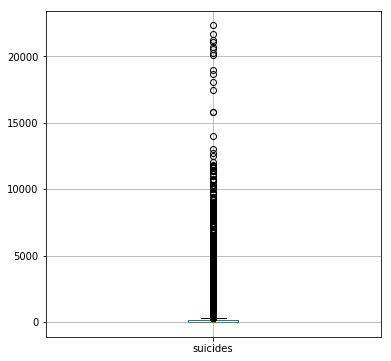

In [53]:
suicides.boxplot(column='suicides');

###### This is raw data so we can't get a whole lot from this

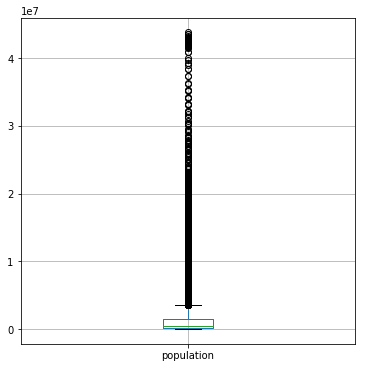

In [54]:
suicides.boxplot(column='population');

###### Same for this one

## Conclusion

###### This Data was taken from a keggle csv data set that had already been clean and organized. It makes sense that there was 50% cardinality for the sex of the suicide victims because the data is structured by alternating between males and females for each year in each country. There were also no missing values or duplicates


There are 0 duplicate rows 
There are 0 missing values
Nothing noteworthy in the cardinalities - all relatively high.
There are outliers in the variables suicides, population, suicide_rate and gdp_per_capita

In [55]:
#Post QA save
suicides.to_csv("data/suicides.2.clean.csv", index=False)